In [2]:
# Import Matplotlib and Seaborn
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('young-people-survey-responses.csv')
df['Age Category'] = df.Age.apply(lambda x: 'Less than 21' if x<21 else '21+')  #<-.map(lambda..) do the same!!
df['Interested in Math'] = df.Mathematics.apply(lambda x: True if x>3 else False)
co = {1:'Never',2:'Rarely',3:'Often',4:'Sometimes',5:'Always'}
df = df.dropna(subset=["Parents' advice"])   #<-remember to re-assign it to df!!!!!!!!
df['Parents Advice in words'] = df["Parents' advice"].map(lambda x: co[x]) #<-hv to remove the NaN to make the maping works
df['Interested in Pets'] = df['Pets'].apply(lambda x: 'Yes' if x>3 else 'No')
df['Likes Techno']=df['Techno'].apply(lambda x: True if x>3 else False)

student_data = pd.read_csv('student-alcohol-consumption.csv')
mpg = pd.read_csv('mpg.csv')
# mpg['mpg_mean'] = mpg.groupby(['model_year','origin'])['mpg'].mean()

mpg_mean = mpg.groupby(['model_year','origin']).agg({'mpg':np.mean}).reset_index()
mpg_mean.rename(columns={'mpg':'mpg_mean'},inplace=True)

## below are dfs for intermediate seaborn
tuition = pd.read_csv('2010 US School Improvement Grants.csv')
insur = pd.read_csv('Automobile Insurance Premiums.csv')


## for the following csv, when read, the error 'utf-8' codec can't decode byte 0xb0 in position 2: invalid start byte" shows up
## solution: https://stackoverflow.com/questions/54133455/importing-csv-using-pd-read-csv-invalid-start-byte-error
## the error due to encoding on your file not being the default as mentioned by the pd.read_csv() docs , 
# you can find the encoding of the file by first installing chardet followed by the below code:

# import chardet    
# rawdata = open('US Housing and Urban Development FY 2018 Fair Market Rent.csv', 'rb').read()
# result = chardet.detect(rawdata)
# charenc = result['encoding']
# print(charenc)   #<-- 'ISO-8859-1'

urban = pd.read_csv('US Housing and Urban Development FY 2018 Fair Market Rent.csv', encoding = 'ISO-8859-1')
guests = pd.read_csv('Daily Show Guests.csv', encoding = 'ISO-8859-1')
score = pd.read_csv('2018 College Scorecard Tuition.csv')
bike = pd.read_csv('Washington DC Bike Share.csv')

Making a count plot with a list

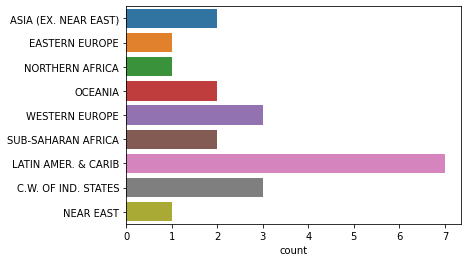

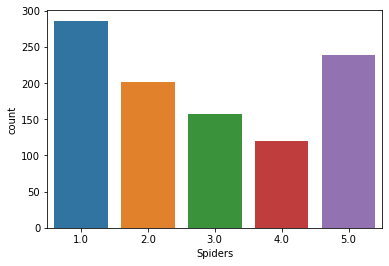

In [3]:
region = ['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA', 'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA', 'LATIN AMER. & CARIB', 'LATIN AMER. & CARIB',
 'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'LATIN AMER. & CARIB', 'OCEANIA', 'WESTERN EUROPE', 'C.W. OF IND. STATES', 'LATIN AMER. & CARIB', 'NEAR EAST', 'ASIA (EX. NEAR EAST)', 'LATIN AMER. & CARIB',
 'C.W. OF IND. STATES', 'WESTERN EUROPE', 'LATIN AMER. & CARIB', 'SUB-SAHARAN AFRICA']
# Create count plot with region on the y-axis
sns.countplot(y=region)

# Show plot
plt.show()

################
# Create a count plot with "Spiders" on the x-axis
sns.countplot(x="Spiders",data=df)

# Display the plot
plt.show()


hue

Text(0.5, 0.98, 'hahaha')

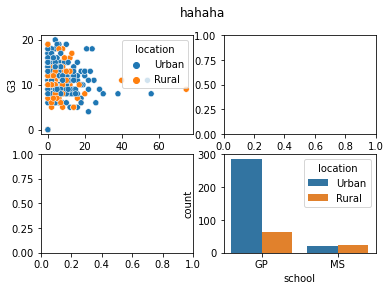

In [4]:
fig,ax=plt.subplots(2,2)
sns.scatterplot(x='absences',y='G3',data=student_data,hue='location',ax=ax[0,0])
sns.countplot(x='school',data=student_data,hue='location',ax=ax[1,1])

fig.suptitle('hahaha')  #<-ax.set_title not working here again

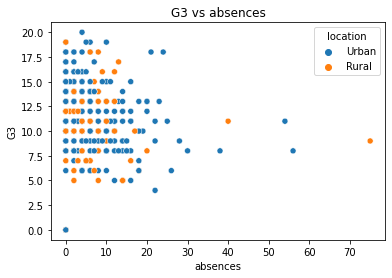

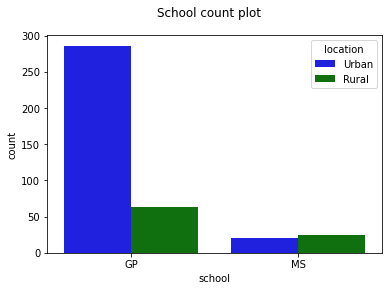

In [5]:
# Create a scatter plot of absences vs. final grade

sns.scatterplot(x='absences',y='G3',data=student_data,hue='location').set_title("G3 vs absences")


# Show plot
plt.show()

##############################
# Create a dictionary mapping subgroup values to colors
palette_colors = {'Rural': "green", 'Urban': "blue"}

# Create a count plot of school with location subgroups

fig,ax=plt.subplots()
sns.countplot(x='school',data=student_data,hue='location',palette=palette_colors)
fig.suptitle("School count plot")

# Display plot
plt.show()


Introduction to relational plots and subplots

In [6]:
student_data.head()

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


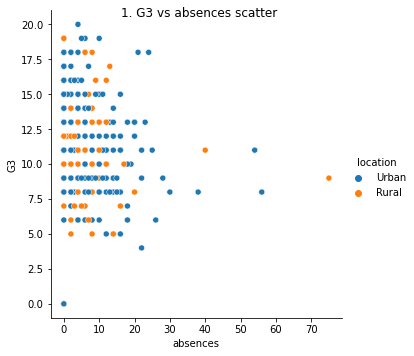

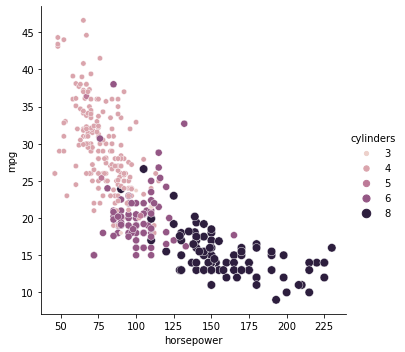

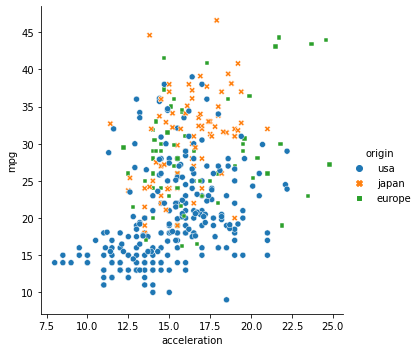

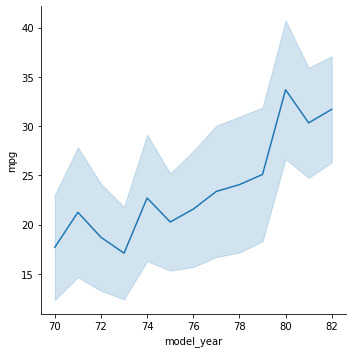

mean at 1970:  17.7
upper 1 SD at 1970:  23.0
lower 1 SD at 1970:  12.4


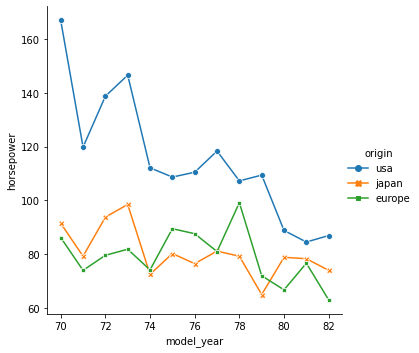

In [7]:
# use relplot() instead of scatterplot() since it offers more flexibility.

# Change to use relplot() instead of scatterplot()
g = sns.relplot(x="absences", y="G3", 
                data=student_data,kind='scatter',hue='location')

## recall relplot and catplot are Facetplot (?), and they dont take .set_title()
## have to use g.fig.suptitle to set!!
g.fig.suptitle("1. G3 vs absences scatter")

plt.show()

#####################
# Changing the size of scatter plot points

sns.relplot(x='horsepower',y='mpg',data=mpg,kind='scatter',size='cylinders',hue='cylinders')#<-size of the pts depends on the value in cylinder
plt.show()

######################

# use different style of points according to the 'origin' col
sns.relplot(x='acceleration',y='mpg',data=mpg,hue='origin',style='origin',kind='scatter')
plt.show()

#######################
## when kind='line', by default, the resulting plot shows the mean and 95% CI for each unit as shaded area
# Make the shaded area show the standard deviation using ci='sd'
# tuen off shade areas using ci=None

sns.relplot(x="model_year", y="mpg",data=mpg, kind="line",ci='sd')
plt.show()

## showing the shaded area really is +- 1 sd around the mean using 1970 as example
print('mean at 1970:  ' + str(round(mpg[mpg.model_year==70]['mpg'].mean(),1)))
print('upper 1 SD at 1970:  ' + str(round(mpg[mpg.model_year==70]['mpg'].mean()+
                                          mpg[mpg.model_year==70]['mpg'].std(),1)))
print('lower 1 SD at 1970:  ' + str(round(mpg[mpg.model_year==70]['mpg'].mean()-
                                          mpg[mpg.model_year==70]['mpg'].std(),1)))

# Using style and/or hue to plot subgroups
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", ci=None,
            style='origin',hue='origin',   #<- separating subgroups
            markers=True,dashes=False)    #<-style related

# Show plot
plt.show()

Catplot: countplot, barplot, boxplot, pointplot

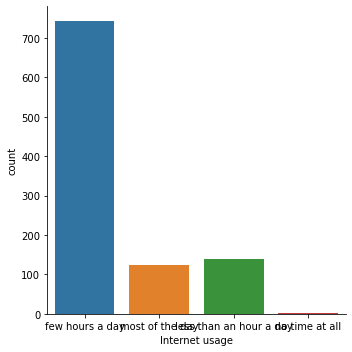

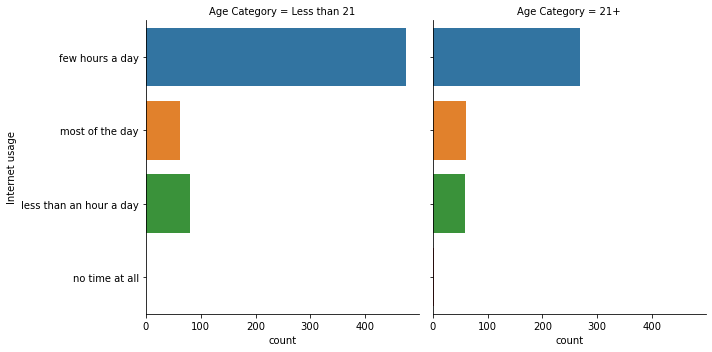

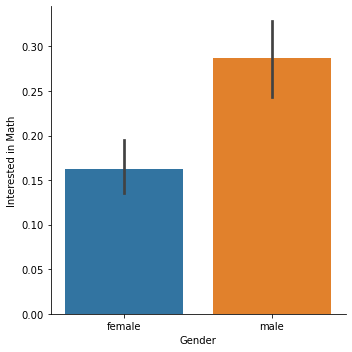

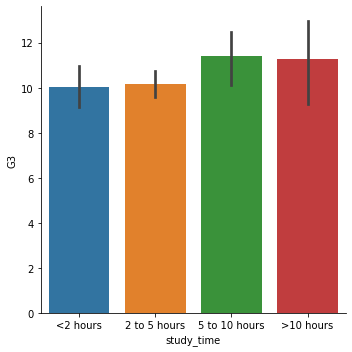

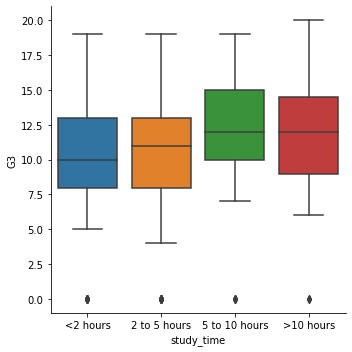

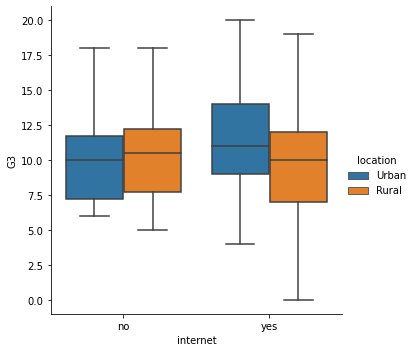

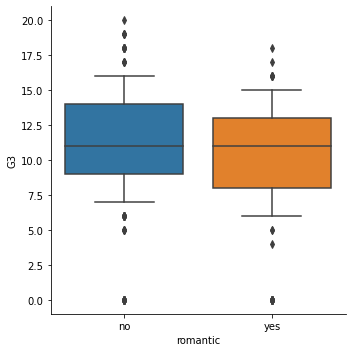

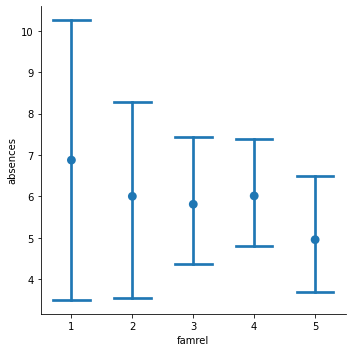

mean absence for famrel=1: 6.88
Upper 95% CI of mean absence for famrel=1: 10.53
Lower 95% CI of mean absence for famrel=1: 3.22


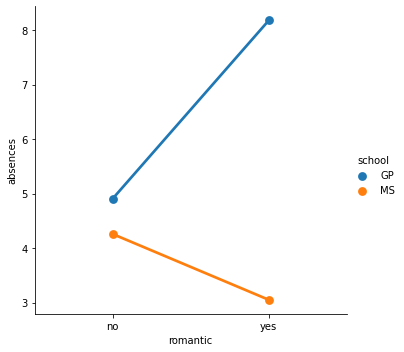

In [8]:
sns.catplot(x='Internet usage',data=df,kind='count')
plt.show()
##########
## Creating subplots!
sns.catplot(y="Internet usage", data=df,  #<-changed orientation
            kind="count",col='Age Category')  #<-put diff subplots in graph columns
plt.show()
############
# Create a bar plot of interest in math, separated by gender
sns.catplot(x='Gender',data=df,kind='bar',y='Interested in Math')
plt.show()
##############
## Customizing bar plots
# Rearrange the order of categories on x-axis
sns.catplot(x="study_time", y="G3",data=student_data,
            kind="bar", order=["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"])
plt.show()

##############
## Create and interpret a box plot
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]
# Create a box plot and set the order of the categories
sns.catplot(x='study_time',kind='box',y='G3',data=student_data,order=study_time_order)
plt.show()

##############
# Create a box plot with subgroups and omit the outliers
sns.catplot(kind='box',data=student_data, x='internet',y='G3',
            hue='location', #<- creating subgroups
            sym='')     #<-removing outliers
plt.show()

#############
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box", whis=0.5) #<- or change the whiskers to the 5th and 95th percentile by whis=[5,95]
                                  #<- or change the whiskers to min and max value by whis=[0,100]
plt.show()

############
# Create a point plot of family relationship vs. absences. The points show the mean of absence for each lv of famrel
sns.catplot(kind='point',data=student_data,x='famrel',y='absences',
            capsize=0.6,  #<-capsize only controls the little horizontal line at the edge of the CI line. for artisitcs only
           join=False,)    #<- join the points or not  
           #, estimator=median)  #<-- changing the default aggregate method from mean to median. (from numpy import median)
           #,ci='sd') #<-to change the vertical from CI to sd
plt.show()

## showing the vertical lines are 95% CI of the mean at each point
print('mean absence for famrel=1: ' + str(round(student_data[student_data.famrel==1]['absences'].mean(),2)))
SE = student_data[student_data.famrel==1]['absences'].std()/np.sqrt(len(student_data[student_data.famrel==1]['absences'])) #<-standard error
print('Upper 95% CI of mean absence for famrel=1: ' + str(round(student_data[student_data.famrel==1]['absences'].mean()+1.96*SE,2)))
print('Lower 95% CI of mean absence for famrel=1: ' + str(round(student_data[student_data.famrel==1]['absences'].mean()-1.96*SE,2)))

##############
# Create a point plot with subgroups
sns.catplot(kind='point',data=student_data,x='romantic',y='absences',
            hue='school',  #<-subgroping
           ci=None)   #<-# Turn off the confidence intervals for this plot
plt.show()

Changin plot style 

In [29]:
df["Parents Advice in words"].value_counts()

Often        455
Sometimes    344
Rarely       118
Always        56
Never         35
Name: Parents Advice in words, dtype: int64

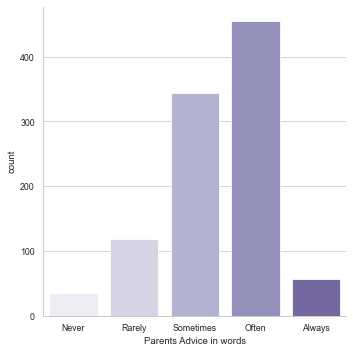

In [9]:
# Set_style
sns.set_style("whitegrid")
sns.set_palette("Purples")  #<-# Set the color palette to "Purples". Try 'RdBu'
# custom = ['#39A7D0','#36ADA4','#FFFF00','#800000','#222222']
# sns.set_palette(custom)    #<---using custom palette

# Set Scale
sns.set_context("paper") # "paper" < "notebook" < "talk" < "poster"

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]
sns.catplot(x="Parents Advice in words", 
            data=df, 
            kind="count", 
            order=category_order)

plt.show()

sns.set()  #<--set Seaborn's default style so not to affect the graphs below!!!
 


FacetGrids vs. AxesSubplots

Seaborn plot functions create two different types of objects: FacetGrid objects and AxesSubplot objects. The method for adding a title to your plot will differ depending on the type of object it is.

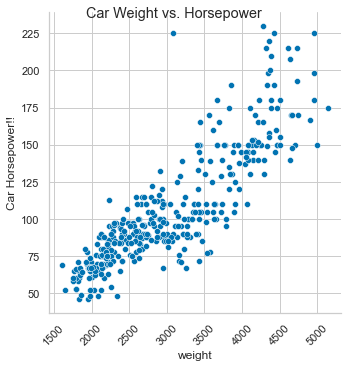

In [31]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
type(g)   #<-<class 'seaborn.axisgrid.FacetGrid'>
## sns.catplot() also creates FacetGrid obj

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")

## modify the y or x label
g.set(ylabel='Car Horsepower!!')

# Rotate x-tick labels.. Recall that the function to rotate x-tick labels is a standalone Matplotlib function and not a function applied to the plot object itself.
plt.xticks(rotation=45)

plt.show()

  

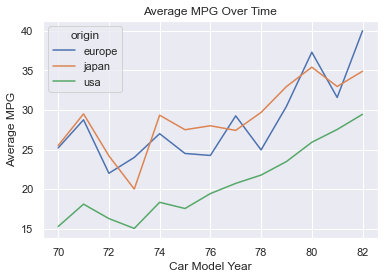

matplotlib.axes._subplots.AxesSubplot

In [11]:
# Create line plot
# Note that lineplot() does not support the creation of subplots, so it returns an AxesSubplot object instead of an FacetGrid object.
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time") . ##<-note, not using g.fig.suptitle()

# Add x-axis and y-axis labels
g.set(xlabel='Car Model Year',ylabel='Average MPG')

plt.show()
type(g)    #<--matplotlib.axes._subplots.AxesSubplot

Building a FacetGrid from intermediate seaborn

Seaborn's FacetGrid is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships.

In [12]:
score.head(3)

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City


In [36]:
score.groupby('Degree_Type').agg({'SAT_AVG_ALL':[np.mean,np.std]})

SAT_AVG_ALL            
                    mean         std
Degree_Type                         
Associates   1017.763158  137.102730
Bachelors    1059.253333  154.042819
Certificate   998.857143   54.986145
Graduate     1067.819277  131.158544
Non-degree   1090.526316  114.527404

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


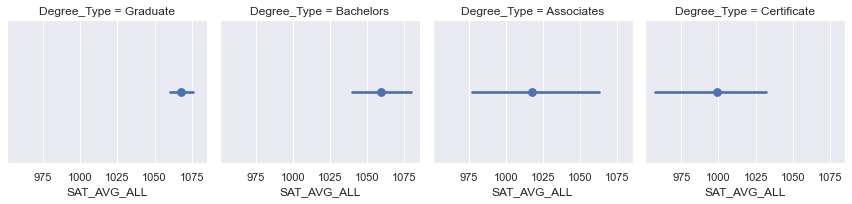

<Figure size 432x288 with 0 Axes>

In [13]:
# Step 1: Create FacetGrid with Degree_Type and specify the order of the rows using row_order (Create a FacetGrid object with columns, rows, or hue.)
g2 = sns.FacetGrid(score, 
             col="Degree_Type",
             col_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Step 2: Map individual plots to the grid.
# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

# df['Degree_Type'].unique()

Using a factorplot (a FacetGrid obj)

(removed as it has been renamed to 'catplot'. The name factorplot will be removed in a future release)

Review

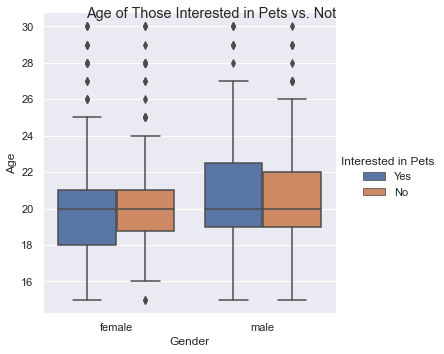

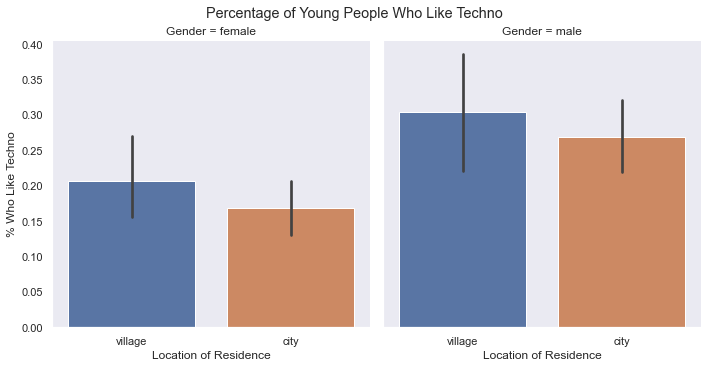

In [14]:
# Set palette to "Blues"
# sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=df, 
                kind="box", hue="Interested in Pets")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")

# Show plot
plt.show()


# Set the figure style to "dark"
sns.set_style('dark')

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=df, kind="bar",
                col='Gender')

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()

Intermediate Seaborn

Distribution Plot vs histogram

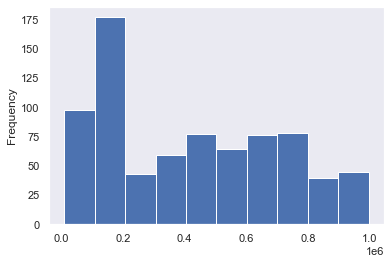

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


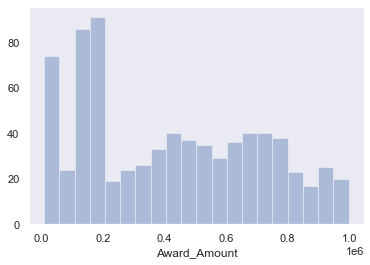

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


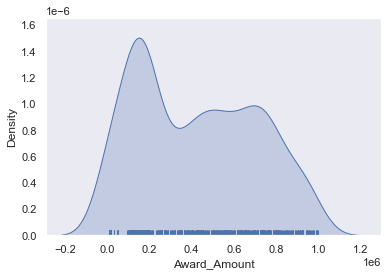

In [15]:
# Display pandas histogram
tuition['Award_Amount'].plot.hist()
plt.show()

plt.clf()   # Clear out the pandas histogram
#########################
# Create a distplot
sns.distplot(tuition['Award_Amount'],
             kde=False,  #<- return a Kernel Density Estimate (KDE) by default. The KDE helps to smooth the distribution and is a useful way to look at the data. 
             bins=20)
plt.show()

######################### continue further refining the output. This process of creating a visualization and updating it in an incremental fashion is a useful and common approach to look at data from multiple perspectives.
sns.distplot(tuition['Award_Amount'],
             hist=False,
             rug=True,                #<-Add a rug plot above the x axis.
             kde_kws={'shade':True})   #<- to show a shaded kde

# Plot the results
plt.show()

Regression Plots: regplot(), residual plot and lmplot()

<class 'matplotlib.axes._subplots.AxesSubplot'>


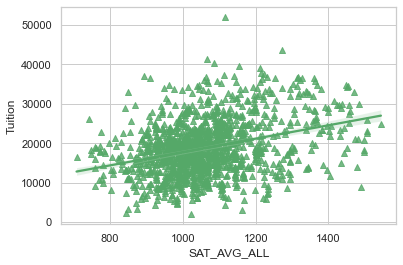

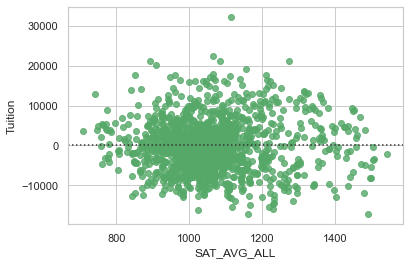

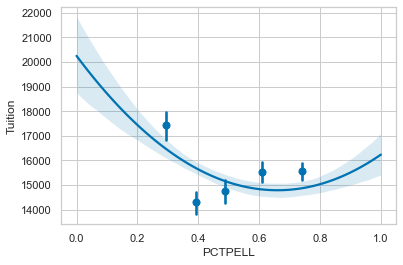

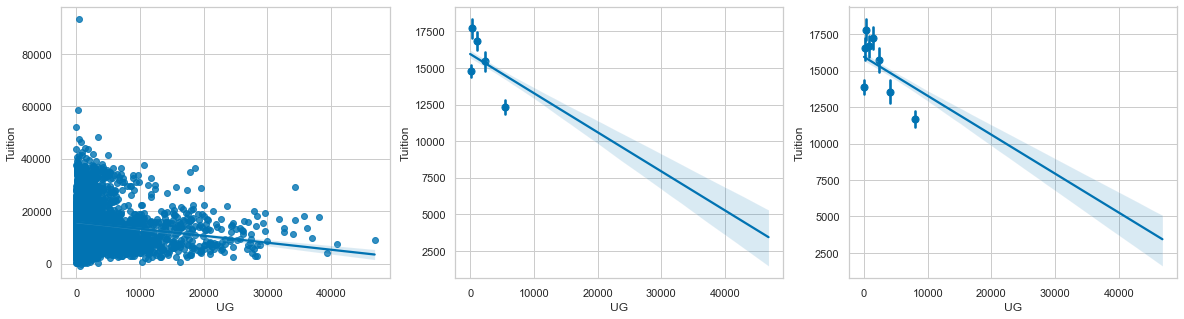

In [66]:
# Create a regression plot of premiums vs. insurance_losses
z = sns.regplot(data=score,x="SAT_AVG_ALL",y="Tuition"
            ,marker='^',color='g')   #<-artistics
            # fit_reg=False     #<-disable the regression line.
print(type(z))                                                         #<-<class 'matplotlib.axes._subplots.AxesSubplot'>
plt.show()

## Residual plot
sns.residplot(data=score,x="SAT_AVG_ALL",y="Tuition",color='g')
plt.show()   #<-Use a residual plot to determine if the relationship looks linear.

##  Breaking continous x into bins and using a polynomial regression line
# When the data on the x axis is a continuous value, it can be useful to break it into different bins in order to get a better visualization of the changes in the data.
sns.regplot(data=score,x="PCTPELL",y="Tuition",
            x_bins=5,    #<-- breaks the PCTPELL column into 5 different bins.
            order=2)    #<-includes a 2nd order polynomial regression line.
plt.show()

###################################
### Changing the x_bins also give some insight
fig, (ax0,ax1,ax2) = plt.subplots(1,3) # recall, 1 col and 3 rows
fig.set_size_inches([20,5])    #<-- control the size of the graph

sns.regplot(data=score,x="UG",y="Tuition",
            ax=ax0),  
sns.regplot(data=score,x="UG",y="Tuition", x_bins=5,
            ax=ax1),  
sns.regplot(data=score,x="UG",y="Tuition", x_bins=8,
            ax=ax2),  
           
plt.show()


Versus a simple scatter plot of PCTPELL vs Tuition

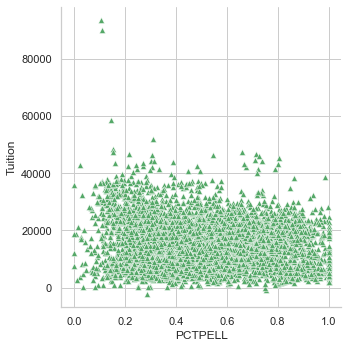

In [63]:
sns.relplot(data=score,x="PCTPELL",y="Tuition",kind="scatter",color='g',marker='^')
## vs
# sns.regplot(data=score,x="PCTPELL",y="Tuition",color='g',marker='^')
## Basically produce same graph (relplot graph ratio looks better)
## but relplot cannot use 'x_bins' but regplot can. Regplot also can fit_reg
## relplot can't show regression line, use lmplot instead (see next section)


lmplot gives similar result as regplot; lmplot is FacetGrid Obj, regplot is AxesSubplot obj

The lmplot is used to plot scatter plots with regression lines on FacetGrid objects. The API is similar to factorplot with the difference that the default behavior of lmplot is to plot regression lines.

<class 'seaborn.axisgrid.FacetGrid'>


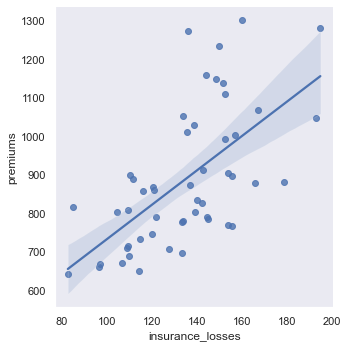

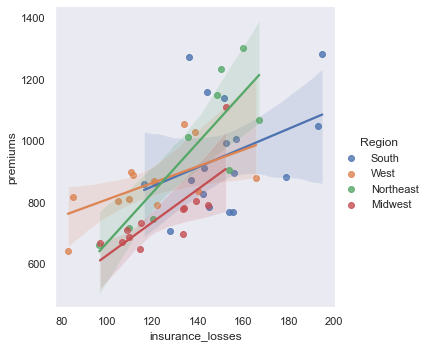

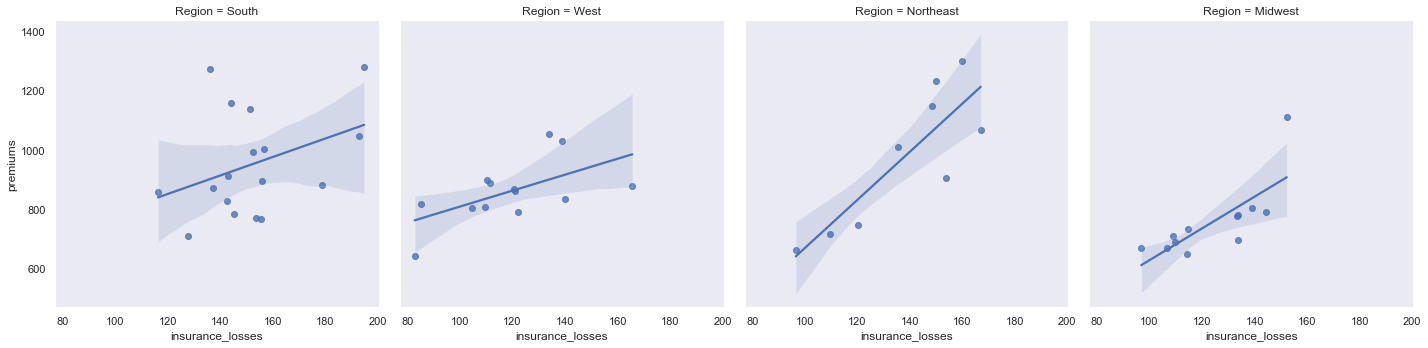

In [17]:
# Create an lmplot of premiums vs. insurance_losses
y = sns.lmplot(data=insur,x="insurance_losses",y="premiums")
print(type(y))                                                  #<-<class 'seaborn.axisgrid.FacetGrid'>
plt.show() #<-Notice how the output looks similar. In future exercises, we will demonstrate the additional options available when using lmplot

# Plotting subgroups using hue
sns.lmplot(data=insur, x="insurance_losses",  y="premiums",
          hue="Region")
plt.show()   #<-Plot a regression line for each Region of the country.

# Create subplots with multiple rows
sns.lmplot(data=insur, x="insurance_losses", y="premiums",
           col="Region")   #<- can also use row='Region'
plt.show()

Implot is a efficient way than using FacetGrid approach:

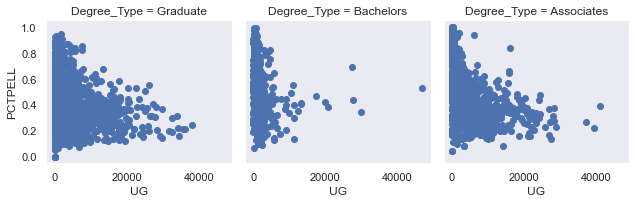

<Figure size 432x288 with 0 Axes>

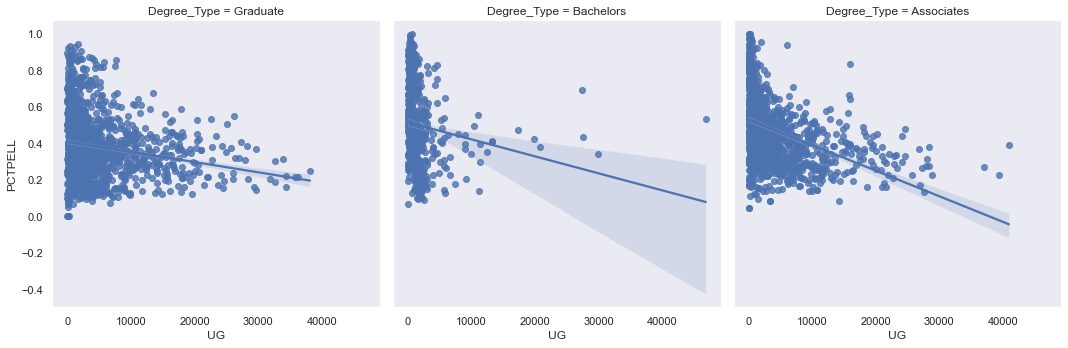

<Figure size 432x288 with 0 Axes>

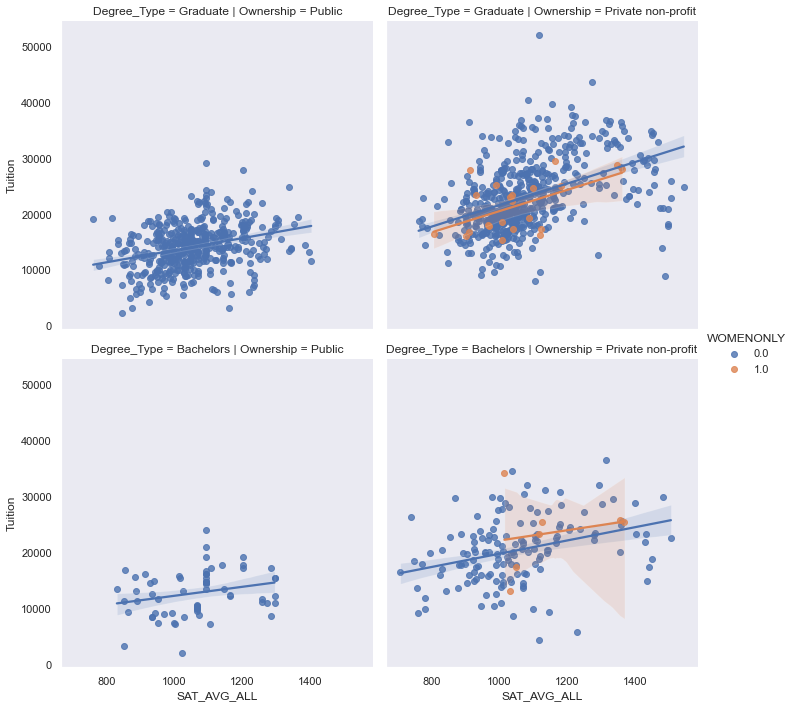

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(score, col="Degree_Type", col_order=['Graduate', 'Bachelors', 'Associates'])

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

# Re-create the plot above as an lmplot
sns.lmplot(data=score,x='UG',y='PCTPELL',col="Degree_Type",col_order=['Graduate', 'Bachelors', 'Associates'])

plt.show()
plt.clf()

# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=score,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=['Public', 'Private non-profit'])

plt.show()
plt.clf()

Setting Style and despine

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


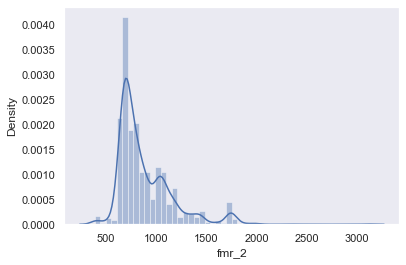

<Figure size 432x288 with 0 Axes>

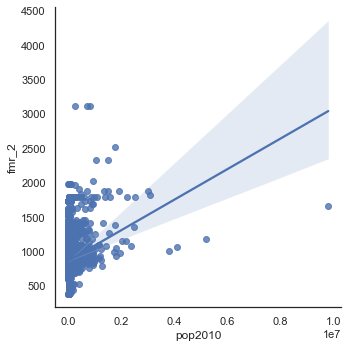

<Figure size 432x288 with 0 Axes>

In [19]:
sns.set_style('dark') #<- try 'whitegrid'
sns.distplot(urban['fmr_2'])

plt.show()
plt.clf()

# Set the style to white
sns.set_style('white')
# Create a regression plot
sns.lmplot(data=urban,
           x='pop2010',
           y='fmr_2')

sns.despine() #<--# Remove the spines.. but seems not working here??

# Show the plot and clear the figure
plt.show()
plt.clf()

Color

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


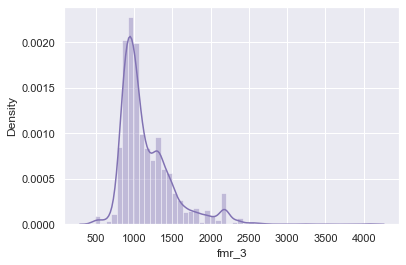

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


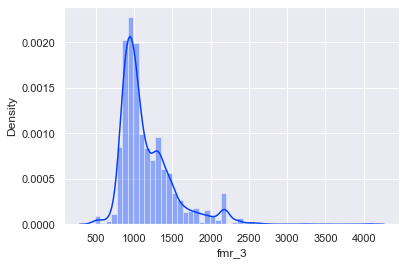

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


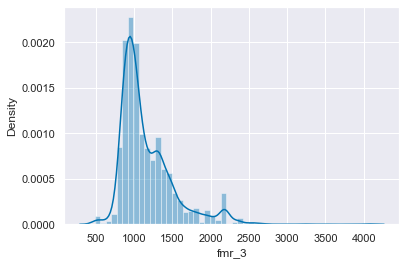

<Figure size 432x288 with 0 Axes>

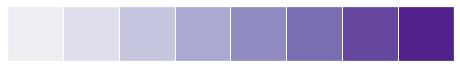

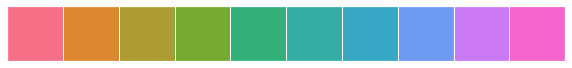

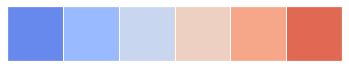

In [20]:
# Set style, enable color code, and create a magenta distplot
sns.set(color_codes=True) #<-Set the default Seaborn style and enable the matplotlib color codes.
sns.distplot(urban['fmr_3'], color='m')  #<-using matplotlib's magenta (m) color code.
plt.show()

# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.distplot(urban['fmr_3'])
    plt.show()
    
    # Clear the plots    
    plt.clf()
    
## Creating custom palettes
#view your palettes by using the palplot() function.
sns.palplot(sns.color_palette('Purples',8))  #<-color_palette() function to create your own custom sequential, categorical, or diverging palettes. 
sns.palplot(sns.color_palette('husl',10))
sns.palplot(sns.color_palette('coolwarm',6))
plt.show()

Customizing with matplotlib

Seaborn uses matplotlib as the underlying library for creating plots. Most of the time, you can use the Seaborn API to modify your visualizations but sometimes it is helpful to use matplotlib's functions to customize your plots. The most important object in this case is matplotlib's axes.

Once you have an axes object, you can perform a lot of customization of your plot.

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


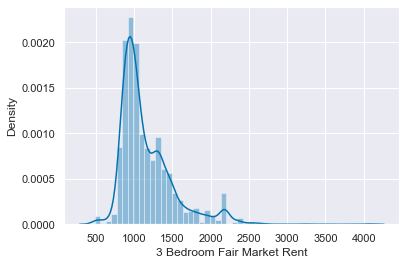

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


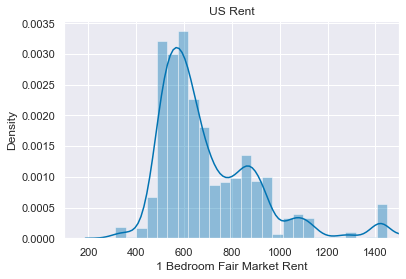

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


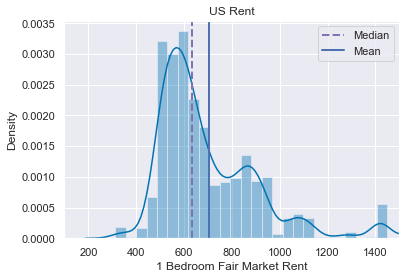

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


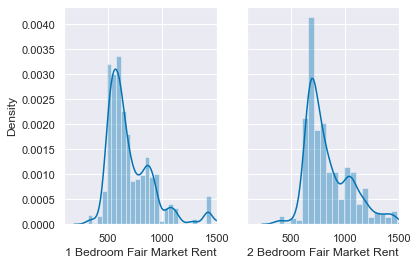

In [21]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.distplot(urban['fmr_3'],ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel="3 Bedroom Fair Market Rent")  #<-without this, sns will shows "fmr_3" as the label

# Show the plot
plt.show()

############################
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.distplot(urban['fmr_1'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="1 Bedroom Fair Market Rent",
       xlim=(100,1500),
       title="US Rent")

# Display the plot
plt.show()

##############################
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.distplot(urban['fmr_1'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
ax.axvline(x=urban['fmr_1'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=urban['fmr_1'].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

############################## Multiple Plots ######################################
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)      #<- same as plt.subplots(1, 2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.distplot(urban['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.distplot(urban['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()

Categoical Plot type: stripplot() , swarmplot() , boxplot() , violinplot(), lvplot() (hv been renamed to boxenplot())

In [1]:
tuition['Model Selected'].value_counts()

NameError: name 'tuition' is not defined

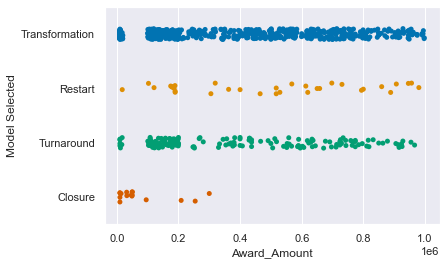

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


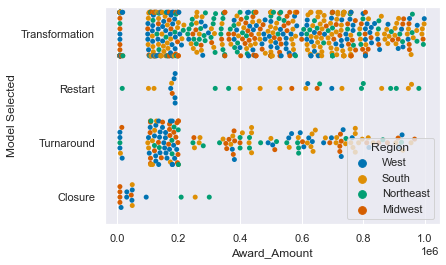

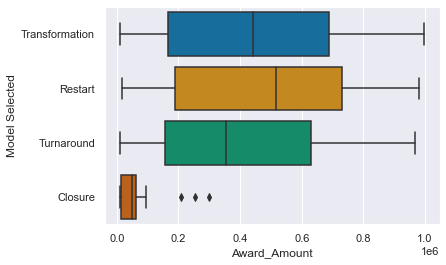

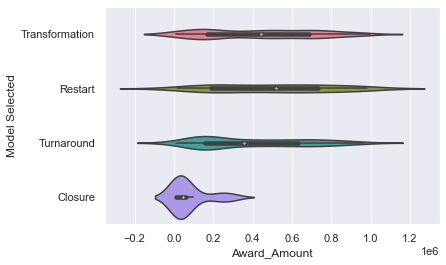

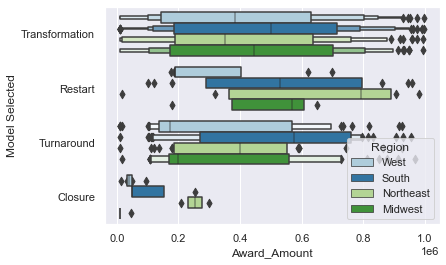

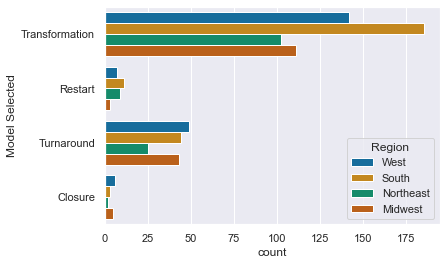

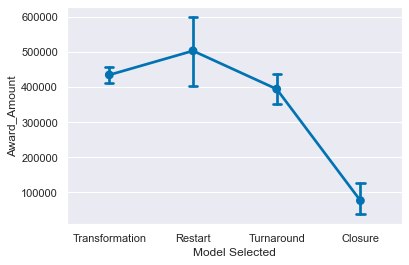

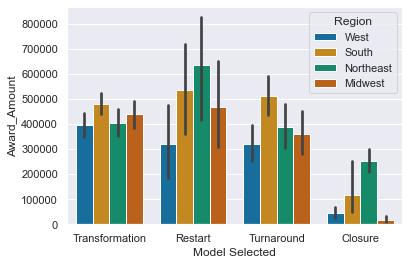

<Figure size 432x288 with 0 Axes>

In [22]:
# Create the stripplot..  looking at the individual Award_Amounts and how they are distributed among the 4 categories.
sns.stripplot(data=tuition, x='Award_Amount',y='Model Selected',
         jitter=True)
plt.show()
#####################################
sns.swarmplot(data=tuition,x='Award_Amount',y='Model Selected',
         hue='Region')
plt.show()
#####################################
# Create a boxplot
sns.boxplot(data=tuition,x='Award_Amount',y='Model Selected')
plt.show()
plt.clf()
#####################################
# Create a violinplot with the husl palette
sns.violinplot(data=tuition,x='Award_Amount', y='Model Selected',
         palette='husl')
plt.show()
plt.clf()
#####################################
# Create a lvplot with the Paired palette and the Region column as the hue
sns.boxenplot(data=tuition ,x='Award_Amount',y='Model Selected',palette='Paired',
         hue='Region')
plt.show()
plt.clf()

############# The final group of categorical plots are barplots, pointplots and countplot which create statistical summaries of the data. #############
# Show a countplot with the number of models used with each region a different color
sns.countplot(data=tuition, y="Model Selected",hue="Region")
plt.show()
plt.clf()
#####################################
# Create a pointplot and include the capsize in order to show bars on the confidence interval
sns.pointplot(data=tuition,y='Award_Amount',x='Model Selected',
         capsize=.1)
plt.show()
plt.clf()
#####################################
# Create a barplot with each Region shown as a different color
sns.barplot(data=tuition,y='Award_Amount', x='Model Selected',
         hue="Region")
plt.show()
plt.clf()

Matrix plots: Heatmap (A heatmap is a common matrix plot that can be used to graphically summarize the relationship between two variables.)

YEAR            1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Group                                                                        
Academic           0     0     2     0     4     1    12     9    13     5   
Acting           108   100    92    84    74    51    44    44    25    26   
Advocacy           0     1     0     1     0     4     0     0     2     3   
Athletics          0     3     1     2     0     2     2     5     4     1   
Business           0     1     0     0     0     2     1     1     2     1   
Clergy             0     0     0     1     1     1     0     0     1     0   
Comedy            25    12    11     5    12     7     5     8     9     7   
Consultant         0     0     0     0     1     4     1     4     2     3   
Government         0     0     2     1     2     3     1     3     1     0   
Media             11    21    31    42    41    45    54    47    47    77   
Military           0     0     0     0     0     0     1     1  

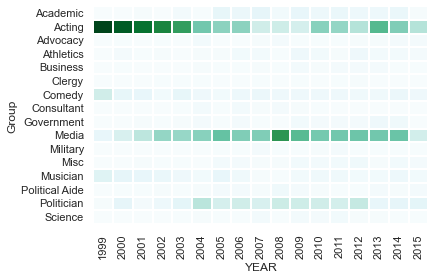

In [23]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(guests["Group"], guests["YEAR"])   #<--Use pandas' crosstab() function to build a table of visits by Group and Year.(get the data into the right format for Seaborn's heatmap function to correctly plot the data. )
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab,
           cbar=False,     #<-with no color bar
            cmap="BuGn",   #<-using the BuGn palette
            linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

Using PairGrid and pairplot

When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of variables. This step is normally a precursor to additional investigation.
Seaborn supports this pair-wise analysis using the PairGrid

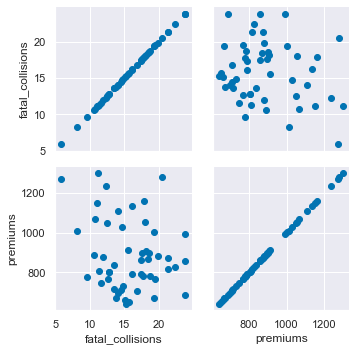

<Figure size 432x288 with 0 Axes>

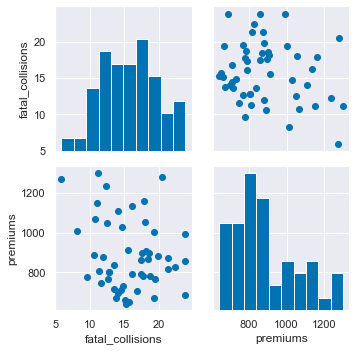

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(insur, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(insur, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

Using a pairplot()

The pairplot() function is generally a more convenient way to look at pairwise relationships. In this exercise, we will create the same results as the PairGrid using less code. Then, we will explore some additional functionality of the pairplot(). We will also use a different palette and adjust the transparency of the diagonal plots using the alpha parameter.

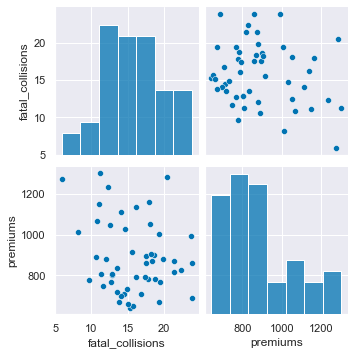

<Figure size 432x288 with 0 Axes>

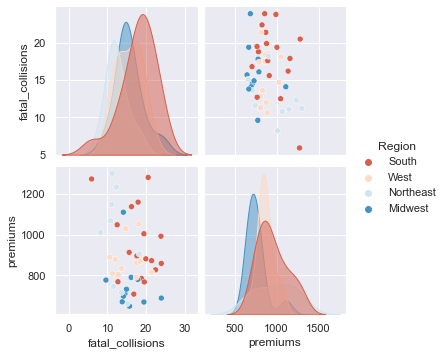

<Figure size 432x288 with 0 Axes>

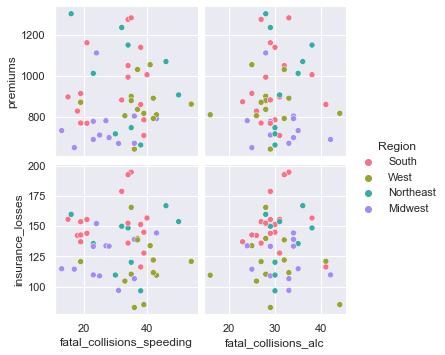

<Figure size 432x288 with 0 Axes>

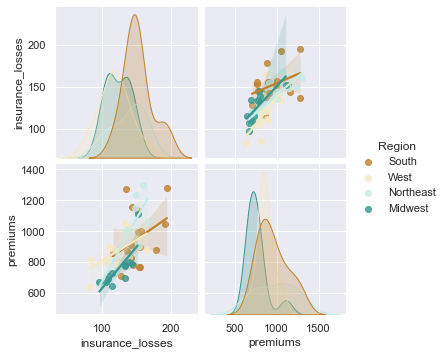

<Figure size 432x288 with 0 Axes>

In [25]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=insur,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()
plt.clf()

# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=insur,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})   #<- adjust the transparency of the diagonal plots using the alpha parameter.

plt.show()
plt.clf()

# Build a pairplot with different x and y variables
## One area of customization that is useful is to explicitly define the x_vars and y_vars that you wish to examine. 
# Instead of examining all pairwise relationships, this capability allows you to look only at the specific interactions that may be of interest.

# Create a pair plot that examines fatal_collisions_speeding and fatal_collisions_alc on the x axis and premiums and insurance_losses on the y axis.
sns.pairplot(data=insur,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()


# plot relationships between insurance_losses and premiums
sns.pairplot(data=insur,
             vars=["insurance_losses", "premiums"],
             kind='reg',     #<- reg plot for the the non-diagonal plots.
             palette='BrBG',
             diag_kind = 'kde',  #<--use diag_kind to control the types of plots shown on the diagonals
             hue='Region')

plt.show()
plt.clf()

Using JointGrid and jointplot

Seaborn's JointGrid combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots. These plots also demonstrate how Seaborn provides convenient functions to combine multiple plots together.

/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


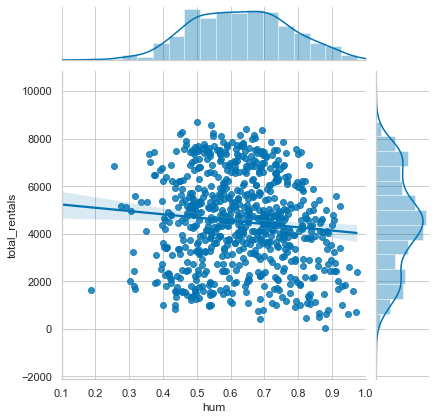

<Figure size 432x288 with 0 Axes>

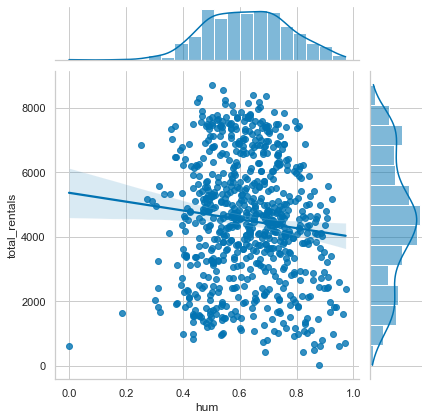

<Figure size 432x288 with 0 Axes>

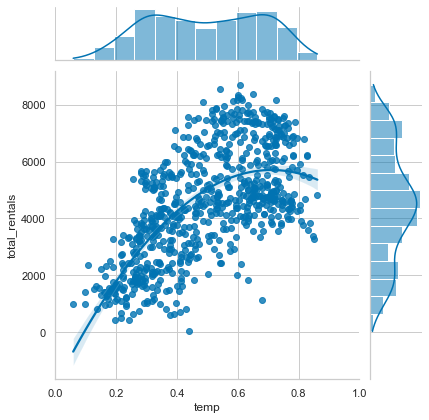

AttributeError: 'JointGrid' object has no attribute 'annotate'

<Figure size 432x288 with 0 Axes>

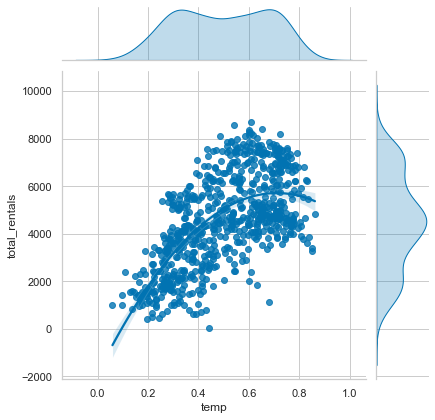

In [26]:
#  we will look at the relationship between humidity levels and total rentals to see if there is an interesting relationship we might want to explore later.
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",     #<-Create a JointGrid() with "hum" on the x-axis and "total_rentals" on the y.
            y="total_rentals",
            data=bike,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)   #<-Plot a regplot() and distplot() on the margins.

plt.show()
plt.clf()


# Create a jointplot similar to the JointGrid 
# sns.set_style("whitegrid")
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=bike)

plt.show()
plt.clf()

#######################################
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",    #<-- Create a jointplot with a 2nd order polynomial regression plot comparing temp and total_rentals.
         y="total_rentals",
         kind='reg',
         data=bike,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

## JointGrid verson below

from scipy import stats
g = sns.JointGrid(x="temp",y="total_rentals",data=bike)

g = g.plot_joint(sns.regplot,order=2)
g = g.plot_marginals(sns.kdeplot,shade=True)
g = g.annotate(stats.pearsonr)

plt.show()


# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',     #<--- Use a residual plot to check the appropriateness of the model.
        data=bike,
        order=2)

plt.show()
plt.clf()

Complex jointplots

The jointplot is a convenience wrapper around many of the JointGrid functions. However, it is possible to overlay some of the JointGrid plots on top of the standard jointplot

In [ ]:
# In this example, we can look at the different distributions for riders that are considered casual versus those that are registered.

# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot

g = sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=bike,
             marginal_kws=dict(bins=10, rug=True)).plot_joint(sns.kdeplot)

plt.show()
plt.clf()

# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=bike,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()